In [1]:
import re
import os
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
XIC = '/home/francis/Documents/FomoNet/results/DIA-NN/ctr/report.XIC.tsv'

with open(XIC, 'r') as f:
    xic = pd.read_csv(f, sep='\t')

# Extract the ion type from given row
get_ion_type = lambda row: ''.join([row['FragmentType'], str(int(row['FragmentSeriesNumber']))])
# Etract run name fron the file name
get_run_name = lambda file_name: os.path.split(file_name)[-1].split('.')[0]

# Columns which contains intensities and retention times
chromatogram_col = [col for col in xic.columns if bool(re.match(r'\d+', col))]

# Initalize dict to store intensities and retention times
# res = {pep: {get_run_name(file): defaultdict(dict) 
#              for file in xic['File.Name'].unique()}
#        for pep in xic['Stripped.Sequence'].unique()}

res = {pep:defaultdict(lambda: defaultdict(dict)) 
       for pep in xic['Stripped.Sequence'].unique()}

# Extract chromatograms data and fill the dict
for _, row in xic.iterrows():
    pep = row['Stripped.Sequence']
    run = os.path.split(row['File.Name'])[-1].split('.')[0]
    ion = get_ion_type(row) if row['MS.Level'] == 2 else 'precursor'
    
    if row['Intensities'] == 1:
        res[pep][run][ion]['intensities'] = row[chromatogram_col].to_numpy()
    else:
        res[pep][run][ion]['retention_times'] = row[chromatogram_col].to_numpy()


In [14]:
def plot_elution_profile(data_dict):

    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.left'] = False
    mpl.rcParams['ytick.major.width'] = 0

    # Get the 
    
    fig, ax = plt.subplots(figsize=(10, 5))

    # Set the axis
    max_intensities = (max(data_dict['precursor']['intensities'])+10000)//10000*10000
    ax.set_yticks(np.arange(0, max_intensities, ((max_intensities)/5)))
    ax.ticklabel_format(style='plain')    # Disable scientific notation
    max_rt = round(max(data_dict['precursor']['retention_times'])+0.1, 1)
    min_rt = round(min(data_dict['precursor']['retention_times'])-0.1, 1)
    ax.set_xticks(np.round(np.arange(min_rt, max_rt, (max_rt - min_rt)/10), 1))

    # Set the labels and plot title
    ax.set_ylabel('Intensity')
    ax.set_xlabel('Retention time (min)')
    ax.grid(axis='both', linestyle='-', linewidth=0.5, color='lightgray')

    # Plot precursor ion line
    ax.plot(data_dict['precursor']['retention_times'], 
            data_dict['precursor']['intensities'], label='precursor')
    ax.legend(ncol=len(data_dict), bbox_to_anchor=(0.5, -0.25),
              loc='lower center', frameon=False)
    
    # Plot fragment ions lines
    for ion, data in sorted(data_dict.items()):
        if ion == 'precursor':
            continue
        
        if np.sum(data['intensities']) == 0:
            continue
        
        ax.plot(data['retention_times'], data['intensities'], label=ion)
        ax.legend(ncol=len(data_dict), bbox_to_anchor=(0.5, -0.25),
                  loc='lower center', frameon=False)

In [15]:
res['AAKQPHVGDYR']

defaultdict(<function __main__.<lambda>()>,
            {'COVARIS_50_ctr_3': defaultdict(dict,
                         {'precursor': {'retention_times': array([8.25026, 8.28627, 8.32215, 8.35818, 8.39424, 8.43025, 8.46623,
                                  8.50217, 8.54034, 8.57631, 8.61235, 8.64838, 8.6843, 8.72021,
                                  8.75615], dtype=object),
                           'intensities': array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 47418.3, 85941.9, 208986.0, 0.0,
                                  48483.4, 0.0, 0.0, 0.0, 0.0], dtype=object)},
                          'b6': {'retention_times': array([8.25555, 8.29156, 8.32744, 8.36347, 8.39952, 8.43554, 8.47152,
                                  8.50766, 8.54563, 8.5816, 8.61763, 8.65367, 8.68959, 8.7255,
                                  8.76144], dtype=object),
                           'intensities': array([9297.8, 10347.7, 0.0, 10377.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                  0.0,

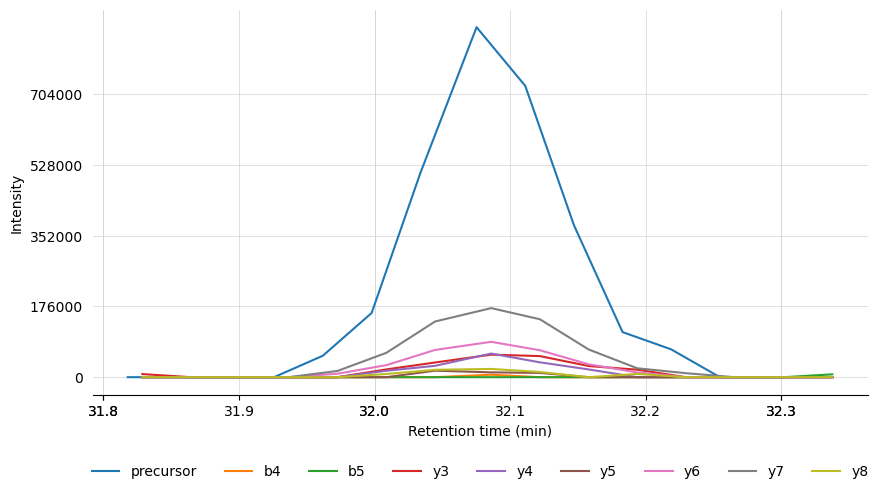

In [16]:
plot_elution_profile(res['LLCGLLAER']['COVARIS_50_ctr_1'])